<a href="https://colab.research.google.com/github/fatihbe25/bootrainDS/blob/master/Extra_Study/GoodReadsBooks_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#REFERANCES
#https://medium.com/analytics-vidhya/how-to-directly-download-kaggle-dataset-to-google-drive-aa06175712e2
#https://www.kaggle.com/suraj2596/download-datasets-to-your-google-drive

#Configuration environment

import os

os.environ['KAGGLE_USERNAME'] = "fatihbe" # username from the json file
os.environ['KAGGLE_KEY'] = "<KEY>" # key from the json file

!kaggle datasets download -d bahramjannesarr/goodreads-book-datasets-10m -p "/content/drive/My Drive/DSStudyData"

goodreads-book-datasets-10m.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_style('whitegrid') 

In [4]:
## REFERANCE : https://stackoverflow.com/questions/44575251/reading-multiple-files-contained-in-a-zip-file-with-pandas


from zipfile import ZipFile

zip_file = ZipFile('/content/drive/My Drive/DSStudyData/goodreads-book-datasets-10m.zip')

booksOrj=pd.DataFrame(columns=pd.read_csv(zip_file.open("book1-100k.csv"),index_col="Id").columns)
booksOrj.head()

for file in zip_file.infolist():
  #print(file.filename)
  if file.filename.startswith('book') and file.filename.endswith('csv'):
    print(file.filename, " binding to dataframe books...",end= "  ---> ")
    booksOrj=pd.concat([booksOrj, pd.read_csv(zip_file.open(file.filename),index_col="Id")])
    print("OK")

booksOrj.sort_index( inplace=True)
booksOrj.head(10)

book1-100k.csv  binding to dataframe books...  ---> OK
book1000k-1100k.csv  binding to dataframe books...  ---> OK
book100k-200k.csv  binding to dataframe books...  ---> OK
book1100k-1200k.csv  binding to dataframe books...  ---> OK
book1200k-1300k.csv  binding to dataframe books...  ---> OK
book1300k-1400k.csv  binding to dataframe books...  ---> OK
book1400k-1500k.csv  binding to dataframe books...  ---> OK
book1500k-1600k.csv  binding to dataframe books...  ---> OK
book1600k-1700k.csv  binding to dataframe books...  ---> OK
book1700k-1800k.csv  binding to dataframe books...  ---> OK
book1800k-1900k.csv  binding to dataframe books...  ---> OK
book1900k-2000k.csv  binding to dataframe books...  ---> OK
book2000k-3000k.csv  binding to dataframe books...  ---> OK
book200k-300k.csv  binding to dataframe books...  ---> OK
book300k-400k.csv  binding to dataframe books...  ---> OK
book400k-500k.csv  binding to dataframe books...  ---> OK
book500k-600k.csv  binding to dataframe books...  ---

,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews,PagesNumber
1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960,NaN,NaN,NaN
2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781,NaN,NaN,NaN
3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458,NaN,NaN,NaN
4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352,4:706082,total:2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821,NaN,NaN,NaN
5,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848,NaN,NaN,NaN
6,Harry Potter and the Goblet of Fire (Harry Pot...,1:9419,734,4:606800,total:2431085,28,9,Scholastic,31978,2002,eng,J.K. Rowling,4.56,2:24282,5:1612165,NaN,3:178419,NaN,NaN,NaN
8,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",1:402,2690,4:4650,total:43968,13,9,Scholastic,166,2004,eng,J.K. Rowling,4.78,2:283,5:37432,0439682584,3:1201,NaN,NaN,NaN
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",1:0,152,4:7,total:28,26,4,Nimble Books,1,2005,en-US,W. Frederick Zimmerman,3.79,2:5,5:10,0976540606,3:6,NaN,NaN,NaN
10,"Harry Potter Collection (Harry Potter, #1-6)",1:257,3342,4:4358,total:30313,12,9,Scholastic,809,2005,eng,J.K. Rowling,4.73,2:218,5:24406,0439827604,3:1074,NaN,NaN,NaN
12,The Ultimate Hitchhiker's Guide: Five Complete...,1:3443,815,4:75683,total:274268,1,11,Gramercy Books,255,2005,eng,Douglas Adams,4.37,2:7613,5:157499,0517226952,3:30030,NaN,NaN,NaN


In [5]:
books=booksOrj.copy()

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313459 entries, 1 to 2999999
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Name                   1313459 non-null  object 
 1   RatingDist1            1313459 non-null  object 
 2   pagesNumber            835078 non-null   object 
 3   RatingDist4            1313459 non-null  object 
 4   RatingDistTotal        1313459 non-null  object 
 5   PublishMonth           1313459 non-null  object 
 6   PublishDay             1313459 non-null  object 
 7   Publisher              1300092 non-null  object 
 8   CountsOfReview         1313459 non-null  object 
 9   PublishYear            1313459 non-null  object 
 10  Language               213351 non-null   object 
 11  Authors                1313459 non-null  object 
 12  Rating                 1313459 non-null  float64
 13  RatingDist2            1313459 non-null  object 
 14  RatingDist5       

In [7]:
books.Name.nunique()

1172713

In [8]:
books[ books.Name.duplicated(keep=False)].sort_values(["Name"]).head(10)


,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews,PagesNumber
1295385,"""Bee My Valentine!""",1:2,32,4:4,total:48,1,12,Greenwillow Books,4,1978,NaN,Miriam Cohen,3.19,2:13,5:11,0688841295,3:18,The pupils of a first grade class prepare for ...,4.0,NaN
799864,"""Bee My Valentine!""",1:2,32,4:4,total:48,1,1,Yearling,1,1996,NaN,Miriam Cohen,3.19,2:13,5:11,0440411211,3:18,The pupils of a first grade class prepare for ...,1.0,NaN
530114,"""Believing Women"" in Islam: Unreading Patriarc...",1:35,272,4:272,total:1137,15,6,University of Texas Press,35,2002,eng,Asma Barlas,4.27,2:43,5:641,0292709048,3:146,NaN,NaN,NaN
834326,"""Believing Women"" in Islam: Unreading Patriarc...",1:37,254,4:272,total:1141,1,5,SAMA,1,2005,eng,Asma Barlas,4.26,2:43,5:644,8121511518,3:145,NaN,1.0,NaN
2212889,"""Dark Pictures"" and Other Stories",1:1,NaN,4:3,total:9,8,4,"University of Michigan, Center For Japanese St...",0,2000,NaN,Hiroshi Noma,3.67,2:1,5:3,0939512025,3:1,Michigan Monograph Series in Japanese Studies ...,NaN,192.0
1128118,"""Dark Pictures"" and Other Stories",1:1,177,4:3,total:9,4,8,"University of Michigan, Center for Japanese St...",4,2000,NaN,Hiroshi Noma,3.67,2:1,5:3,0939512033,3:1,The short stories that Noma Hiroshi produced i...,4.0,NaN
1304197,"""Defects"": Engendering the Modern Body",1:0,344,4:2,total:4,4,1,University of Michigan Press,0,2000,NaN,Helen Elizabeth Deutsch,4.50,2:0,5:2,0472066986,3:0,"<i>""Defects""</i> brings together essays on the...",0.0,NaN
2157302,"""Defects"": Engendering the Modern Body",1:0,NaN,4:2,total:4,1,6,University of Michigan Press,0,2000,NaN,Helen Elizabeth Deutsch,4.50,2:0,5:2,0472096982,3:0,"<i>""Defects""</i> brings together essays on the...",NaN,344.0
1149273,"""Fire! Fire!"" Said Mrs. McGuire",1:14,32,4:27,total:153,1,3,HMH Books for Young Readers,0,1996,NaN,Bill Martin Jr.,3.14,2:30,5:26,0152275622,3:56,"Smoke is rising in the city, but help is on th...",0.0,NaN
384845,"""Fire! Fire!"" Said Mrs. McGuire",1:14,32,4:27,total:153,1,5,HMH Books for Young Readers,5,2006,NaN,Bill Martin Jr.,3.14,2:30,5:26,0152057250,3:56,NaN,NaN,NaN


In [9]:
books[books.duplicated(keep = False)]

,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews,PagesNumber
76770,Recommended Dietary Allowances,1:0,302,4:0,total:0,1,2,National Academies Press,0,1989,NaN,National Research Council,0.00,2:0,5:0,0309046335,3:0,NaN,NaN,NaN
76770,Recommended Dietary Allowances,1:0,302,4:0,total:0,1,2,National Academies Press,0,1989,NaN,National Research Council,0.00,2:0,5:0,0309046335,3:0,NaN,NaN,NaN
76772,The Circle Comes Full: New England Southern Ba...,1:0,400,4:0,total:0,1,1,Providence House Publishers,0,1998,NaN,Merwyn Borders,0.00,2:0,5:0,1577360877,3:0,NaN,NaN,NaN
76772,The Circle Comes Full: New England Southern Ba...,1:0,400,4:0,total:0,1,1,Providence House Publishers,0,1998,NaN,Merwyn Borders,0.00,2:0,5:0,1577360877,3:0,NaN,NaN,NaN
76773,The God We Never Knew: Beyond Dogmatic Religio...,1:7,192,4:279,total:749,19,5,HarperOne,65,2015,NaN,Marcus J. Borg,4.21,2:25,5:335,0060610352,3:103,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86037,The Eleanor Roosevelt Papers: The Human Rights...,1:1,1121,4:1,total:8,1,1,Gale Cengage,0,2007,NaN,Eleanor Roosevelt,4.12,2:0,5:5,0684314754,3:1,NaN,NaN,NaN
86199,A Place in El Paso: A Mexican-American Childhood,1:0,212,4:0,total:0,1,3,University of New Mexico Press,0,1996,NaN,Gloria Lopes-Stafford,0.00,2:0,5:0,0826316875,3:0,NaN,NaN,NaN
86199,A Place in El Paso: A Mexican-American Childhood,1:0,212,4:0,total:0,1,3,University of New Mexico Press,0,1996,NaN,Gloria Lopes-Stafford,0.00,2:0,5:0,0826316875,3:0,NaN,NaN,NaN
86203,Paso Adelante,1:1,400,4:0,total:2,11,7,Cengage Learning,1,2006,NaN,Sharon Ahern Fechter,3.00,2:0,5:1,0618253327,3:0,NaN,NaN,NaN


In [10]:
books.drop_duplicates(inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


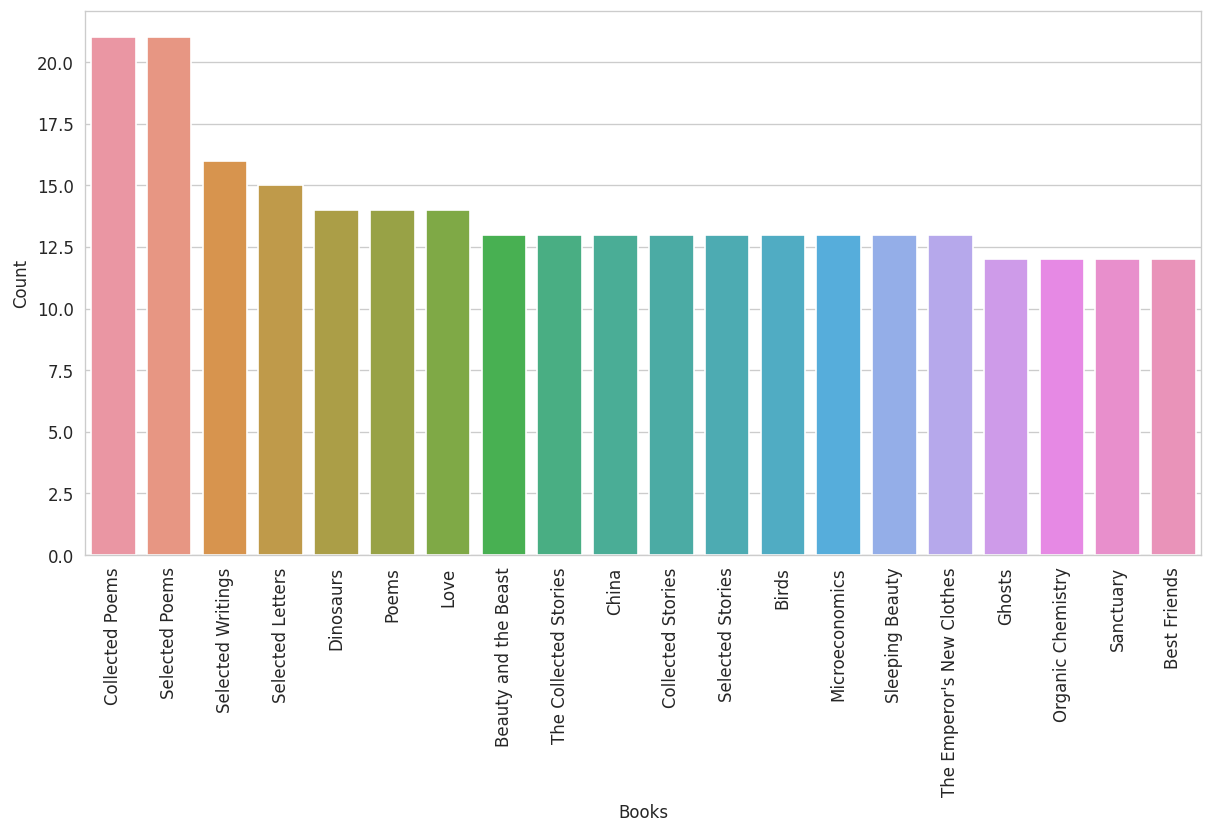

In [11]:
populer_books=books[~books[["Name","Authors"]].duplicated()]["Name"].value_counts().head(20)

plt.figure(figsize=(12,6),dpi=120)
sns.barplot(populer_books.index,populer_books.values)
plt.xticks(rotation=90)
plt.xlabel("Books")
plt.ylabel("Count")
plt.show()

In [12]:
books["Authors"].nunique()

482789

In [13]:
books.groupby(["Authors"]).Name.count().sort_values(ascending=False).head(20)

Authors
Anonymous                           2311
Unknown                             1277
William Shakespeare                 1163
Francine Pascal                      862
Agatha Christie                      747
Fodor's Travel Publications Inc.     704
Harold Bloom                         687
Isaac Asimov                         628
Carolyn Keene                        588
Nora Roberts                         585
R.L. Stine                           577
Stephen King                         575
Hal Leonard Publishing Company       544
Various                              516
Walt Disney Company                  471
NOT A BOOK                           458
Ann M. Martin                        458
Mark Twain                           454
Enid Blyton                          436
Arthur Conan Doyle                   425
Name: Name, dtype: int64

In [14]:
books.Rating.describe()

count    1.313347e+06
mean     3.208325e+00
std      1.511727e+00
min      0.000000e+00
25%      3.140000e+00
50%      3.780000e+00
75%      4.070000e+00
max      5.000000e+00
Name: Rating, dtype: float64

(array([215502.,      0.,   3970.,    991.,  16172.,  24431., 171931.,
        407322., 364294., 108734.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

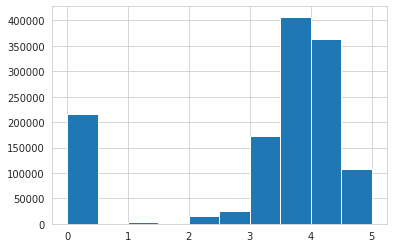

In [15]:
plt.hist(books.Rating)

In [16]:
books.PublishDay=books.PublishDay.astype("int")
books.PublishMonth=books.PublishMonth.astype("int")
books.PublishYear=books.PublishYear.astype("int")

books[["PublishDay","PublishMonth","PublishYear"]].describe()

,PublishDay,PublishMonth,PublishYear
count,1.313347e+06,1.313347e+06,1.313347e+06
mean,7.443140e+00,8.485893e+00,1.998813e+03
std,7.112148e+00,8.730230e+00,8.659738e+01
min,1.000000e+00,1.000000e+00,1.620000e+02
25%,1.000000e+00,1.000000e+00,1.995000e+03
50%,6.000000e+00,6.000000e+00,2.001000e+03
75%,1.000000e+01,1.200000e+01,2.005000e+03
max,3.100000e+01,3.100000e+01,6.553500e+04


In [17]:
days=books.PublishDay.unique()
days.sort()
months=books.PublishMonth.unique()
months.sort()

print("Days:\n",days) 
print("Months:\n",months)

Days:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Months:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [18]:
booksBckp=books.copy()

In [19]:
#books.groupby(["PublishMonth","PublishDay"])[["PublishMonth","PublishDay"]].count()

#books[(books.PublishMonth>12)][["PublishDay","PublishMonth","PublishYear"]]

books["PublishDayTmp"]=books["PublishDay"]

books.loc[books.PublishMonth>12,"PublishDay"]= books.loc[books.PublishMonth>12,"PublishMonth"]
books.loc[books.PublishMonth>12,"PublishMonth"]= books.loc[books.PublishMonth>12,"PublishDayTmp"]


In [20]:
days=books.PublishDay.unique()
days.sort()
months=books.PublishMonth.unique()
months.sort()

print("Days:\n",days) 
print("Months:\n",months)


Days:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Months:
 [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [21]:
years=books.PublishYear.unique()
years.sort()
years

array([  162,   199,   200,   208,   299,  1376,  1384,  1623,  1753,
        1824,  1833,  1835,  1838,  1839,  1841,  1846,  1847,  1850,
        1851,  1852,  1854,  1856,  1859,  1862,  1865,  1866,  1874,
        1878,  1879,  1880,  1881,  1889,  1892,  1894,  1895,  1897,
        1898,  1899,  1900,  1901,  1902,  1903,  1904,  1905,  1906,
        1907,  1908,  1909,  1910,  1911,  1912,  1913,  1914,  1915,
        1916,  1917,  1918,  1919,  1920,  1921,  1922,  1923,  1924,
        1925,  1926,  1927,  1928,  1929,  1930,  1931,  1932,  1933,
        1934,  1935,  1936,  1937,  1938,  1939,  1940,  1941,  1942,
        1943,  1944,  1945,  1946,  1947,  1948,  1949,  1950,  1951,
        1952,  1953,  1954,  1955,  1956,  1957,  1958,  1959,  1960,
        1961,  1962,  1963,  1964,  1965,  1966,  1967,  1968,  1969,
        1970,  1971,  1972,  1973,  1974,  1975,  1976,  1977,  1978,
        1979,  1980,  1981,  1982,  1983,  1984,  1985,  1986,  1987,
        1988,  1989,

In [22]:
books_with_bad_year=books[(books.PublishYear<1800) | (books.PublishYear>2020)]
#books_with_bad_year
books.drop(books_with_bad_year.index,inplace=True)

In [23]:
for col in books.columns:
  if col.startswith("RatingDist") and books[col].dtype!='int':
    books[col] = books[col].apply(lambda rating:rating.split(':')[1]).astype('int')

In [24]:
books[['RatingDistTotal', 'RatingDist1', 'RatingDist2', 'RatingDist3', 'RatingDist4', 'RatingDist5']].describe()

,RatingDistTotal,RatingDist1,RatingDist2,RatingDist3,RatingDist4,RatingDist5
count,1.313276e+06,1.313276e+06,1.313276e+06,1.313276e+06,1.313276e+06,1.313276e+06
mean,5.055294e+03,1.157388e+02,2.563103e+02,9.364003e+02,1.620328e+03,2.126516e+03
std,7.925822e+04,2.353757e+03,3.897608e+03,1.241149e+04,2.298033e+04,4.136374e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+01,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00
75%,7.900000e+01,2.000000e+00,5.000000e+00,2.000000e+01,2.700000e+01,2.300000e+01
max,6.905223e+06,5.452500e+05,5.379560e+05,9.996830e+05,1.902780e+06,4.483273e+06


In [25]:
books.CountsOfReview=books.CountsOfReview.astype("int")
books["Count of text reviews"]=books["Count of text reviews"].astype("float")

books[["CountsOfReview","Count of text reviews"]].describe()


,CountsOfReview,Count of text reviews
count,1.313276e+06,409684.000000
mean,1.540957e+01,7.172902
std,3.395625e+02,124.840808
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,0.000000e+00,1.000000
75%,3.000000e+00,3.000000
max,1.544470e+05,43652.000000


In [26]:
books["Language"].unique()

array(['eng', 'en-US', nan, 'fre', 'spa', 'mul', 'en-GB', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'kor', 'tur',
       'gla', 'lit', 'per', 'pol', 'gle', 'cat', 'afr', 'ind', 'frs',
       'sco', 'nav', 'myn', 'gre', 'urd', 'elx', '--', 'cze', 'tlh',
       'ang', 'hin', 'raj', 'nub', 'fin', 'dan', 'heb', 'ypk', 'lao',
       'hye', 'fil', 'frm', 'tgl', 'wak', 'tam', 'scr', 'hun', 'guj',
       'chp', 'tha', 'eus', 'rum', 'fan', 'est', 'epo', 'nqo', 'cop',
       'tel', 'gem', 'haw', 'tib', 'sam', 'bul', 'tah', 'slv', 'slo',
       'mar', 'mah', 'fro', 'aze', 'kan', 'non', 'tli', 'san', 'isl',
       'mal', 'bos', 'hmn', 'cre', 'gmh', 'ave', 'mga', 'lav', 'yid',
       'nld', 'sqi', 'ben', 'ada', 'zap', 'aus', 'kur', 'nob', 'nep',
       'nai'], dtype=object)

In [27]:
books.Language=books.Language.str.replace('en-US','eng').str.replace('en-GB','eng').str.replace('en-CA','eng').str.replace("nldddddddd","nld").str.replace('nlddddddd','nld')
#.str.replace('nld','nl').str.replace("nl","nld")

books.Language=books.Language.astype("str")

langs=books["Language"].unique().tolist()
#langs.remove("--")
langs.sort()
langs

['--',
 'ada',
 'afr',
 'ang',
 'ara',
 'aus',
 'ave',
 'aze',
 'ben',
 'bos',
 'bul',
 'cat',
 'chp',
 'cop',
 'cre',
 'cze',
 'dan',
 'elx',
 'eng',
 'enm',
 'epo',
 'est',
 'eus',
 'fan',
 'fil',
 'fin',
 'fre',
 'frm',
 'fro',
 'frs',
 'gem',
 'ger',
 'gla',
 'gle',
 'glg',
 'gmh',
 'grc',
 'gre',
 'guj',
 'haw',
 'heb',
 'hin',
 'hmn',
 'hun',
 'hye',
 'ind',
 'isl',
 'ita',
 'jpn',
 'kan',
 'kor',
 'kur',
 'lao',
 'lat',
 'lav',
 'lit',
 'mah',
 'mal',
 'mar',
 'mga',
 'msa',
 'mul',
 'myn',
 'nai',
 'nan',
 'nav',
 'nep',
 'nl',
 'nld',
 'nob',
 'non',
 'nor',
 'nqo',
 'nub',
 'per',
 'pol',
 'por',
 'raj',
 'rum',
 'rus',
 'sam',
 'san',
 'sco',
 'scr',
 'slo',
 'slv',
 'spa',
 'sqi',
 'srp',
 'swe',
 'tah',
 'tam',
 'tel',
 'tgl',
 'tha',
 'tib',
 'tlh',
 'tli',
 'tur',
 'urd',
 'wak',
 'wel',
 'yid',
 'ypk',
 'zap',
 'zho']

In [28]:
aa=books[books.Language=="--"]
#aa
for x,row in aa.iterrows():
   print(str(x) + "==> " +  "  https://www.amazon.com/dp/" + row["ISBN"])

books.loc[[2130696,2130683,2053807],"Language"]="spa"
books.loc[[2383967],"Language"]="hrv"

books.loc[books.Language=="--","Language"]="eng"


211273==>   https://www.amazon.com/dp/0140100555
229808==>   https://www.amazon.com/dp/191985584X
806815==>   https://www.amazon.com/dp/0373764081
2053807==>   https://www.amazon.com/dp/8420650366
2098073==>   https://www.amazon.com/dp/3487074370
2130683==>   https://www.amazon.com/dp/8420650374
2130696==>   https://www.amazon.com/dp/8420650285
2383967==>   https://www.amazon.com/dp/8681283715


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


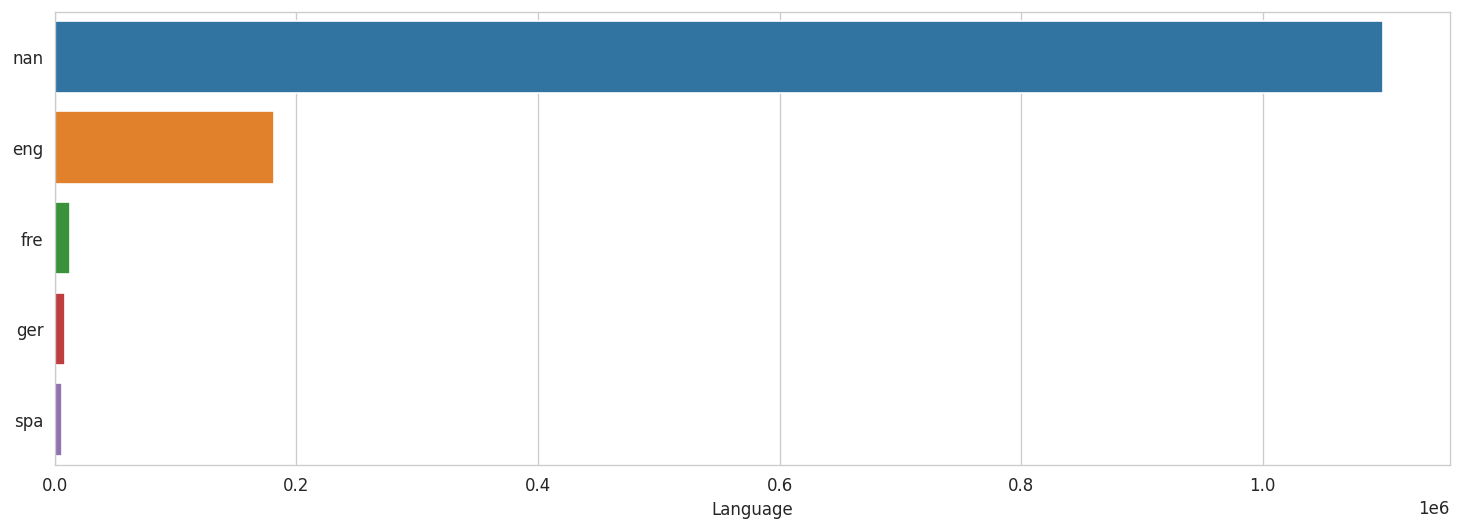

In [175]:
plt.figure(figsize=(15,5),dpi=120)
langdist=books.Language.value_counts().head(5)
sns.barplot(langdist,langdist.index)
plt.show()

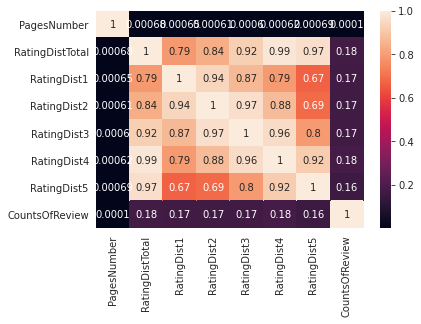

In [179]:
corr=books[["PagesNumber","RatingDistTotal","RatingDist1","RatingDist2","RatingDist3","RatingDist4","RatingDist5","CountsOfReview"]].corr()

sns.heatmap(corr,annot=True)

plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


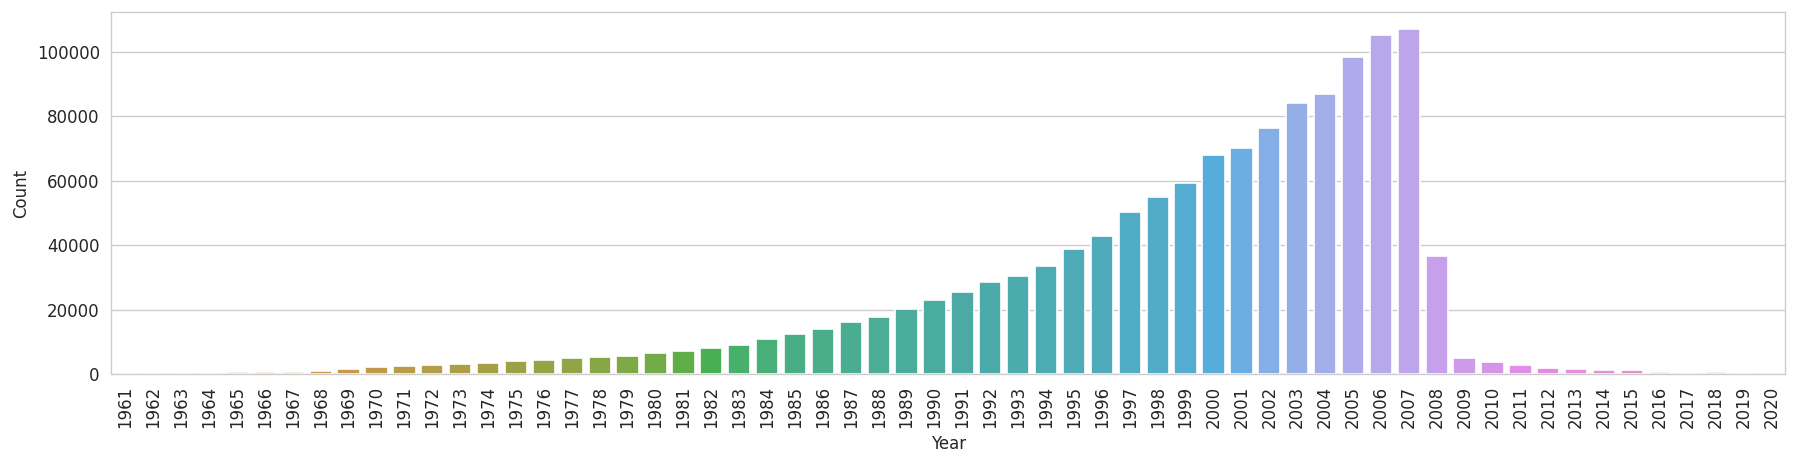

In [187]:
plt.figure(figsize=(18,4),dpi=120)
py=books.groupby("PublishYear").Name.count().tail(60)
sns.barplot(py.index,py)
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [188]:
books.groupby("PublishYear")["PagesNumber"].mean().tail(10)

PublishYear
2011    263.414365
2012    276.032178
2013    274.348966
2014    227.580589
2015    224.492701
2016    246.359155
2017    289.628713
2018    282.411150
2019    284.637427
2020    419.798319
Name: PagesNumber, dtype: float64

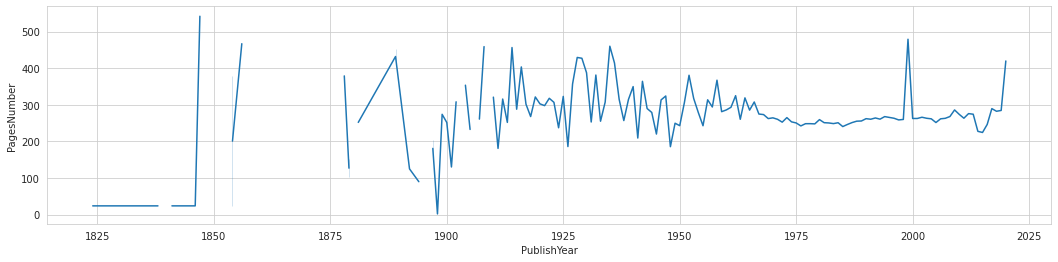

In [189]:
plt.figure(figsize=(18,4)) 
sns.lineplot(x="PublishYear",y="PagesNumber",data=books)
plt.show()

In [29]:
from wordcloud import WordCloud, STOPWORDS
stopwords_names=set(STOPWORDS)
stopwords_names.update(['book','story'])

In [192]:
words_from_names=[word for rows in books.Name.str.lower().str.split() for word in rows if word not in stopwords_names]
names=" ".join(name for  name in words_from_names)

#names


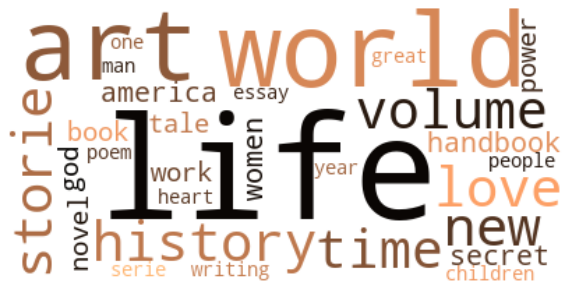

In [193]:
plt.figure(figsize=(10,6))
wordcloud=WordCloud(max_words=30,background_color="white",colormap="copper").generate(names)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

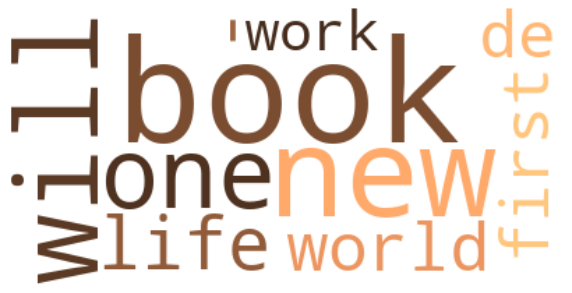

In [30]:
words_from_desc=[word for rows in books.Description.dropna().str.replace('/','').str.replace('\\','')
.str.replace('<br>','').str.replace('<p>','').str.replace('><br','').str.replace('<br','').str.replace('<','')
.str.replace('>','').str.replace('--','').str.replace('.','').str.replace(',','')
.str.lower().str.split() for word in rows if word not in STOPWORDS]

descs_freq=pd.Series(words_from_desc).value_counts().head(10)

plt.figure(figsize=(10,6))
wordcloud=WordCloud(max_words=60,background_color="white",colormap="copper").generate_from_frequencies(frequencies=descs_freq)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()